In [3]:
import json
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.special import sph_harm
#from coefficient_module import *
k_array = np.arange(0.005,3,0.005) # Sample for coefficients
E_array = np.arange(0,0.75,0.005) # Samples for angular distributions
phi_array = np.arange(-2*np.pi,2*np.pi,0.005)

suffix = "_400nm_HighInt"

# Defines the asymmetry parameter from simulation
A = np.load("research_files/A" + f"{suffix}" + ".npy")
PES = np.load("research_files/PES" + f"{suffix}" + ".npy")

with open("research_files/coef_dict" + f"{suffix}"+".json", 'rb') as fp:
    coef = pickle.load(fp)
with open("research_files/coef_dict_organized" + f"{suffix}"+".json", 'rb') as fp:
    coef_organized = pickle.load(fp)

# PES Momentum Peaks

ATI Momenta [0.04  0.205 0.305 0.47  0.515 0.56  0.63  0.7   0.735 0.785 0.845 0.875
 0.92  0.995 1.035 1.105 1.14  1.205 1.235 1.295 1.325 1.405 1.485 1.555
 1.63  1.695 1.76  1.825 1.885 1.94  2.    2.055 2.11  2.16  2.215 2.265
 2.32  2.38  2.44  2.5   2.57  2.64  2.71  2.785 2.865 2.935 2.96  2.99 ]


Text(0, 0.5, 'PES')

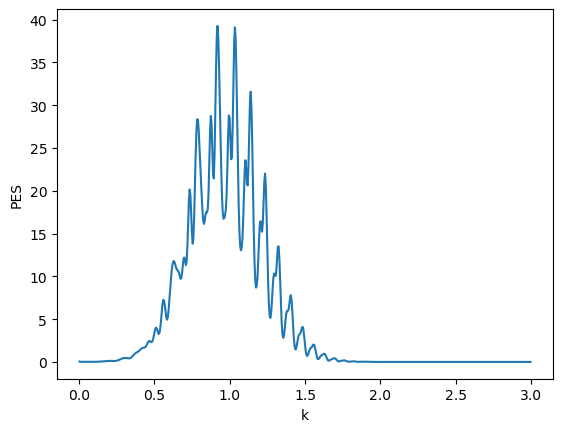

In [6]:
# Use this to find good k_s for sampling peaks
ati_mom = find_ati_mom(PES,k_array,space =5)
print("ATI Momenta",ati_mom)

plt.plot(k_array,PES)
plt.xlabel("k")
plt.ylabel("PES")

# Plots a specific $|c_{l,m}(k)|$ vs k, given $l,m$

Text(0.5, 1.0, '$|c_{26,-26}|$')

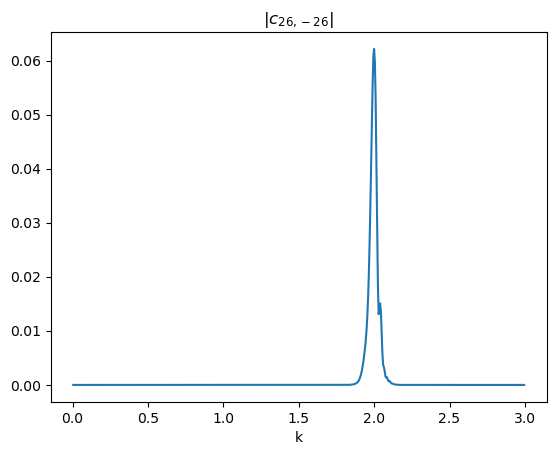

In [6]:
l,m = 26,-26 # Defines l,m values of coefficient

c_of_k = plot_clm(l,m) # Retrieves c_lm(k) as a function ofk
plt.plot(k_array,c_of_k) # Plots c_lm(k) vs momentum
plt.xlabel("k") # Label's x-axis with momentum
plt.title(r"$|c_{{{},{}}}|$".format(l,m)) # Labels for the specific c_lm(k)  

#plt.clf()

# Plots $c_{l,m}(k)$ as a function of $l,m$, given $k_{s}$

([], [])

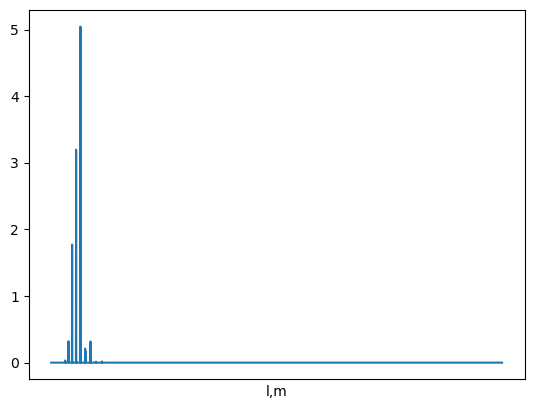

In [8]:
k_s = 1.035 # Defines the momentum to sample

c_lm,lm_array = plot_cks(k_s = k_s) # Retrieves the c_lm(k_s) coefficients and an array of the associated lm values.

plt.plot(c_lm) # Plots c_lm(k_s) against all lm pairs
plt.xlabel("l,m")
plt.xticks([])

#plt.clf()

# Most Contributing l,m's measured by the integral of $|C_{l,m}(k)|$

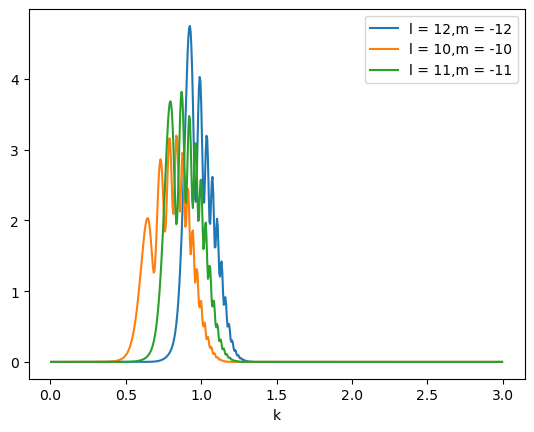

In [9]:
best_lm_values = best_lm(top = 3,method = "integral") # Retrieves the best lm values for the entire 
# distribution by computing the integral of the magnitudes of the coefficients

# Plots the top 3 coefficients c_lm(k) versus momentum
for l,m in best_lm_values:
    c_of_k = plot_clm(l,m)
    plt.plot(k_array,c_of_k,label = "l = {},m = {}".format(l,m))
    plt.xlabel("k")
    plt.legend()
    
#plt.clf()

# Most Contributing factors of $C_{l,m}(k)$ measured by amplitude for a given k, where k corresponds to ATI peak


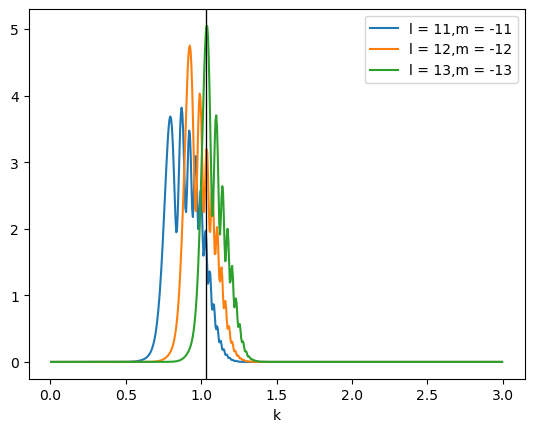

In [14]:
k_s = 1.035

best_lm_values = best_lm(top = 3,method = "sample",k_s = k_s)
for l,m in best_lm_values:
    c_of_k = plot_clm(l,m)
    plt.plot(k_array,c_of_k,label = "l = {},m = {}".format(l,m))
    plt.xlabel("k")
    plt.legend()
    plt.axvline(x = k_s,color = "k",lw = 0.8)
#plt.clf()


#plt.xlim([0.8,1.4])


# Approximating PES using most contributing factors via sample

The best c_lm's are: [[ 13 -13]]


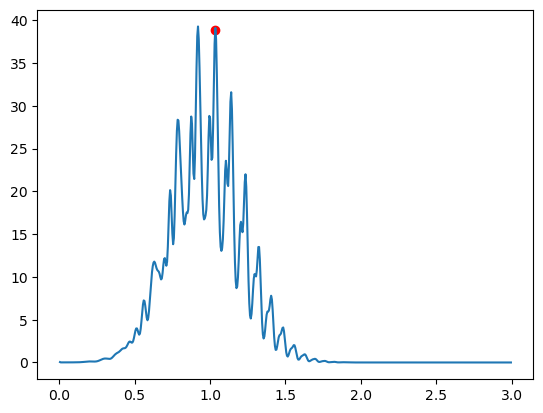

In [19]:
k_s = 1.035

PES_approx = approx_PES(top =3,k_s = k_s)
plt.plot(k_array,PES)
plt.scatter(k_s,PES_approx,color = "r")

print("The best c_lm's are:",best_lm(top = 1,method = "sample",k_s = k_s))

# Doing the same as above for all k values, top 3 isnt bad

Text(0.5, 1.0, 'PES')

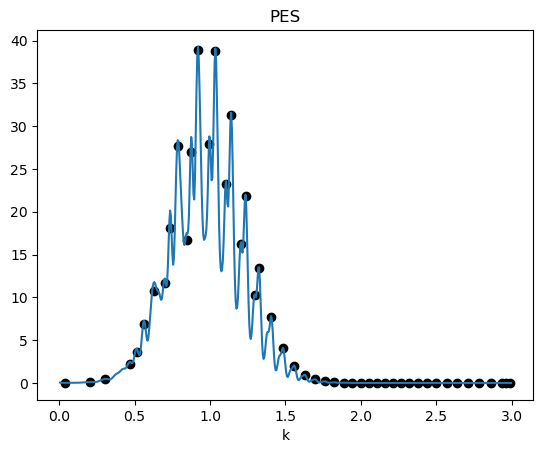

In [20]:
for k_s in ati_mom:
    PES_approx = approx_PES(k_s,top = 3)
    plt.scatter(k_s,PES_approx,color = "k")
plt.plot(k_array,PES)
plt.xlabel("k")
plt.title("PES")

# Asymmetry Plot

[[ 12 -12]
 [ 13 -13]]


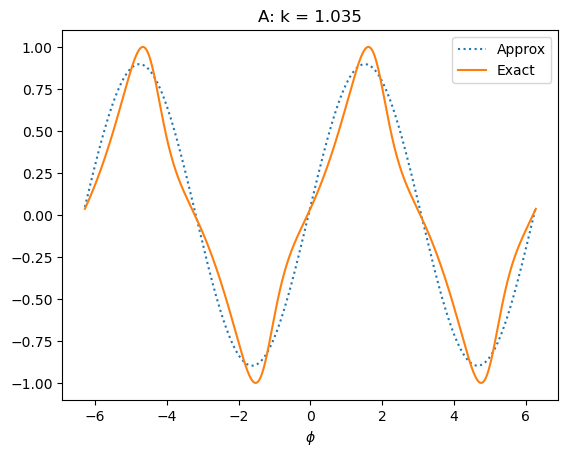

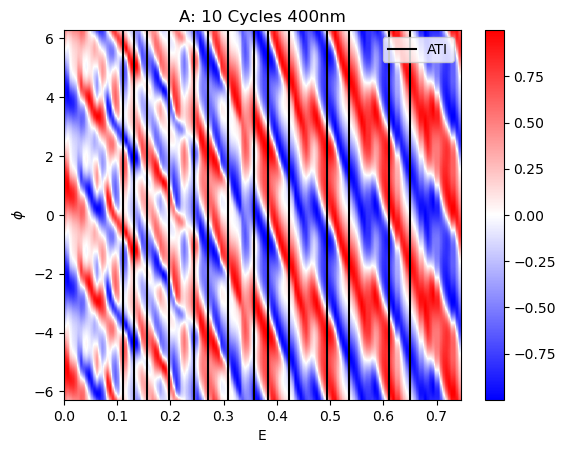

In [13]:
k_s = 1.035

A_approx = approx_A_at_ATI(k_s = k_s,top = 2)

index = list(E_array).index(closest(E_array,k_s**2 /2))
A_slice = A[:,index]

plt.figure()
plt.plot(phi_array,A_approx,label = "Approx",linestyle = "dotted")   
plt.plot(phi_array,A_slice,label = "Exact")
plt.xlabel(r"$\phi$")
plt.title("A: k = {}".format(k_s))
plt.legend()




limits= [E_array.min(),E_array.max(),phi_array.min(),phi_array.max()]
plt.figure()
plt.imshow(A,cmap = "bwr",aspect = "auto",extent = limits)
plt.colorbar()



for index,k_s in enumerate(ati_mom):
    if 0.4 < k_s < 1.2:
        if np.abs(k_s -1.035) < 0.01:
            plt.axvline(x = k_s**2 /2,color = "k",label = "ATI")
        else:
            plt.axvline(x = k_s**2 /2,color = "k")
            

        
plt.xlabel("E")
plt.ylabel(r"$\phi$")
plt.title("A: 10 Cycles 400nm")
plt.legend()

# Best l,m for each peak

In [140]:
def K_MOD(coef_dic, input_par, phi, theta,top_lm_values):
    theta, phi = np.meshgrid(theta, phi)
    out_going_wave = np.zeros(phi.shape, dtype=complex)
    for lm in top_lm_values:
        l, m  = lm
        real,imag = coef_dic[(l,m)][0],coef_dic[(l,m)][1]
        coef = real + 1j * imag
        
        phase = np.arctan2(imag,real)
        r = np.sqrt(real**2 + imag**2)
        out_going_wave += np.exp(1j * phase)*sph_harm(m, l, phi, theta)
        
    return out_going_wave  


def approx_A_phase_only(k_s,top = 3):
    phi_array = np.arange(-2*np.pi,2*np.pi,0.005)            
    theta = np.pi/2
    pad_value = np.zeros((phi_array.size))
    pad_value_rot = np.zeros((phi_array.size))
    
    top_lm_values = best_lm(top = top,method = "sample",k_s = k_s)
    
    for phi_ind,phi in enumerate(phi_array):
        coef_dic = coef_organized[closest(list(coef_organized.keys()), k_s)]
    
        pad_value_k_phi =  np.abs(K_MOD(coef_dic, input_par, phi, theta,top_lm_values))**2
        pad_value_k_phi_pi = np.abs(K_MOD(coef_dic, input_par, phi+np.pi, theta,top_lm_values))**2
        
          
        pad_value[phi_ind] = pad_value_k_phi
        pad_value_rot[phi_ind] = pad_value_k_phi_pi
    numer = (pad_value - pad_value_rot)
    denom = (pad_value + pad_value_rot)

    A = numer/denom
    return A

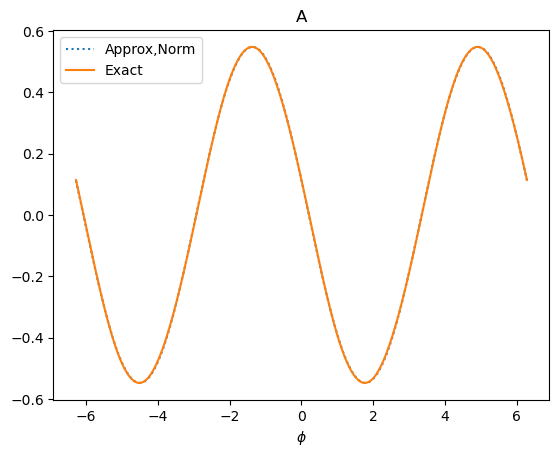

In [153]:
bs_test = approx_A_phase_only(k_s = 0.845,top = 2)

ratio = A_slice.max()/bs_test.max()
#ratio = 1


plt.plot(phi_array,bs_test*ratio,label = "Approx,Norm",linestyle = "dotted")
plt.plot(phi_array,A_slice,label = "Exact")
plt.title("A")
plt.xlabel(r"$\phi$")
plt.legend()

In [10]:
def closest(lst, k):
    return lst[min(range(len(lst)), key = lambda i: abs(float(lst[i])-k))]
def peak_index_finder(array,space):
    indices_of_peaks = find_peaks(array,distance = space)[0]
    return indices_of_peaks
def plot_clm(l,m):
    c_of_k = []
    k_dict = coef[(l,m)]
    for k in k_dict:
        real,imag = k_dict[k]
        c_of_k.append(np.sqrt(real**2 + imag**2))
    return c_of_k 
def plot_cks(k_s):
    lm_list = []
    c_lms = []
    l_array = np.arange(0,51)
    for l in l_array:
        m_array = np.arange(-l,l+1)
        for m in m_array:
                k_dict = coef[(l,m)]
                k_closest = closest(k_array,k_s)
                real,imag = k_dict[k_closest]
                c_lms.append(np.sqrt(real**2 + imag**2))
                
                lm_list.append((l,m))
    return c_lms,np.array(lm_list)
def clmk_integrals():
    I_list = []
    lm_list = []
    
    l_array = np.arange(0,51)
    for l in l_array:
        m_array = np.arange(-l,l+1)
        for m in m_array:
            c_of_k = plot_clm(l,m)
            I = np.trapz(c_of_k,dx = 0.005)
            
            I_list.append(I)
            lm_list.append((l,m))
    return np.array(I_list),np.array(lm_list)

def best_lm(top,method = "integral",k_s = 0):
    if method == "integral":
        I_array,lm_array = clmk_integrals()
        top_lm_indices = np.argsort(I_array)[-top:]
        return lm_array[top_lm_indices]
    
    elif method == "sample":
        c_lms,lm_array = plot_cks(k_s)
        top_lm_indices = np.argsort(c_lms)[-top:]
        return lm_array[top_lm_indices]
def find_ati_mom(PES,k_array,space):
    indices_of_peaks = peak_index_finder(PES,space)
    return k_array[indices_of_peaks]
def approx_PES(k_s,top):
    
    k_best = closest(k_array,k_s)
    
    
    best_lm_values = best_lm(top,method = "sample",k_s = k_s)

    PES_approx = 0

    for contributors in best_lm_values:
        l,m = contributors
        real,imag = coef[(l,m)][k_best]
        PES_approx += real**2 + imag**2 
    return PES_approx



def Input_File_Reader(input_file = "research_files/input.json"):
    with open(input_file) as input_file:
        input_paramters = json.load(input_file)
    return input_paramters
input_par = Input_File_Reader("research_files/input.json")
def Index_Map(input_par):
    l_max = input_par["l_max"]
    m_max = input_par["m_max"]
    block_to_qn = {}
    qn_to_block = {}
    block = 0
    for m in range(0, m_max + 1):
            if m > 0:
                m_minus = -1*m
                for l in range(abs(m_minus), l_max + 1):
                    block_to_qn[block] = (l,m_minus)
                    qn_to_block[(l,m_minus)] = block
                    block += 1
            for l in range(m, l_max + 1):
                block_to_qn[block] = (l,m)
                qn_to_block[(l,m)] = block
                block += 1
    return  block_to_qn, qn_to_block
def K_Sphere(coef_dic, input_par, phi, theta,top_lm_values):
    theta, phi = np.meshgrid(theta, phi)
    out_going_wave = np.zeros(phi.shape, dtype=complex)
    for lm in top_lm_values:
        l, m  = lm
        coef = coef_dic[(l,m)][0] + 1j*coef_dic[(l,m)][1]
        
        out_going_wave += coef*sph_harm(m, l, phi, theta)
    return out_going_wave  

def approx_A_at_ATI(k_s,top = 3):
    phi_array = np.arange(-2*np.pi,2*np.pi,0.005)            
    theta = np.pi/2
    pad_value = np.zeros((phi_array.size))
    pad_value_rot = np.zeros((phi_array.size))
    
    top_lm_values = best_lm(top = top,method = "sample",k_s = k_s)
    print(top_lm_values)
    for phi_ind,phi in enumerate(phi_array):
        coef_dic = coef_organized[closest(list(coef_organized.keys()), k_s)]
    
        pad_value_k_phi =  np.abs(K_Sphere(coef_dic, input_par, phi, theta,top_lm_values))**2
        pad_value_k_phi_pi = np.abs(K_Sphere(coef_dic, input_par, phi+np.pi, theta,top_lm_values))**2
        
        pad_value[phi_ind] = pad_value_k_phi
        pad_value_rot[phi_ind] = pad_value_k_phi_pi
    numer = (pad_value - pad_value_rot)
    denom = (pad_value + pad_value_rot)

    A = numer/denom
    return A